In [1]:
#데이터 가져오기
import numpy as np
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

X = np.array(df_X)
y = np.array(df_y)

# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#모델 준비하기
W = np.random.rand(10)
b = np.random.rand()


In [2]:
def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

def loss(X,W,b,y):
    predictions = model(X,W,b)
    L = MSE(predictions, y)
    return L

# 기울기 
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db


Iteration 10000 : Loss 3444.2939
Iteration 20000 : Loss 3094.4532
Iteration 30000 : Loss 2979.1908
Iteration 40000 : Loss 2933.8089
Iteration 50000 : Loss 2914.7248
Iteration 60000 : Loss 2906.1807
Iteration 70000 : Loss 2902.0814
Iteration 80000 : Loss 2899.9553
Iteration 90000 : Loss 2898.7516
Iteration 100000 : Loss 2898.0005


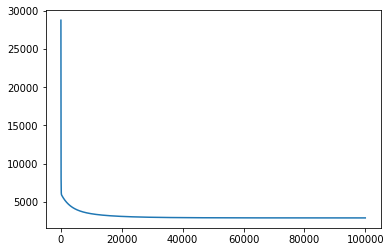

In [3]:
LEARNING_RATE = 0.01

losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [4]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2880.2540037430995

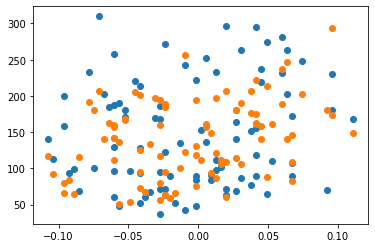

In [5]:
#(11) 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()